In [2]:
import urllib
from IPython.display import Markdown as md

### change to reflect your notebook
_nb_loc = "10_adv_problems/10a_autoencoders.ipynb"
_nb_title = "Autoencoders"
_nb_message = """
Train a vanilla and a deep convolutional autoencoder on MNIST.
"""
### no need to change any of this
_icons=["https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png", "https://www.tensorflow.org/images/colab_logo_32px.png", "https://www.tensorflow.org/images/GitHub-Mark-32px.png", "https://www.tensorflow.org/images/download_logo_32px.png"]
_links=["https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?" + urllib.parse.urlencode({"name": _nb_title, "download_url": "https://github.com/GoogleCloudPlatform/practical-ml-vision-book/raw/master/"+_nb_loc}), "https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}".format(_nb_loc), "https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}".format(_nb_loc), "https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/{0}".format(_nb_loc)]
md("""<table class="tfo-notebook-buttons" align="left"><td><a target="_blank" href="{0}"><img src="{4}"/>Run in AI Platform Notebook</a></td><td><a target="_blank" href="{1}"><img src="{5}" />Run in Google Colab</a></td><td><a target="_blank" href="{2}"><img src="{6}" />View source on GitHub</a></td><td><a href="{3}"><img src="{7}" />Download notebook</a></td></table><br/><br/><h1>{8}</h1>{9}""".format(_links[0], _links[1], _links[2], _links[3], _icons[0], _icons[1], _icons[2], _icons[3], _nb_title, _nb_message))

<table class="tfo-notebook-buttons" align="left"><td><a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name=Autoencoders&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F10_adv_problems%2F04a_autoencoders.ipynb"><img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/>Run in AI Platform Notebook</a></td><td><a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/10_adv_problems/04a_autoencoders.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a></td><td><a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/10_adv_problems/04a_autoencoders.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td><td><a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/10_adv_problems/04a_autoencoders.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a></td></table><br/><br/><h1>Autoencoders</h1>
Train a vanilla and a deep convolutional autoencoder on MNIST.


## Enable GPU
This notebook and pretty much every other notebook in this repository will run faster if you are using a GPU. 

On Colab:
* Navigate to Edit→Notebook Settings
* Select GPU from the Hardware Accelerator drop-down

On Cloud AI Platform Notebooks:
* Navigate to https://console.cloud.google.com/ai-platform/notebooks
* Create an instance with a GPU or select your instance and add a GPU

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [2]:
import tensorflow as tf
print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.3.0
Found GPU at: /device:GPU:0


In [3]:
# Import libraries and modules
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
np.set_printoptions(threshold=np.inf)

1.18.5


## Vanilla Autoencoders

For a vanilla autoencoder, we use just basic `Dense` layers for both the encoder and decoder.

In [4]:
# Create the encoder.
latent_dim = 512
vanilla_encoder = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=1024),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dense(units=512),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dense(units=256),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dense(units=latent_dim),
    ],
    name="vanilla_encoder"
)
vanilla_encoder.summary()

Model: "vanilla_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)           

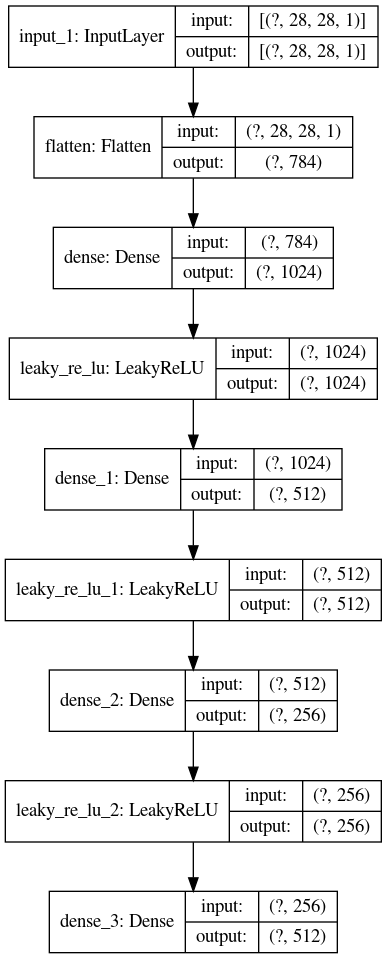

In [5]:
# Plot encoder model.
tf.keras.utils.plot_model(
    model=vanilla_encoder,
    to_file="vanilla_encoder_model.png",
    show_shapes=True,
    show_layer_names=True
)

In [6]:
# Create the decoder.
latent_dim = 512
vanilla_decoder = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(latent_dim,)),
        tf.keras.layers.Dense(units=256),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dense(units=512),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dense(units=1024),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dense(units=28 * 28 * 1, activation="tanh"),
        tf.keras.layers.Reshape(target_shape=(28, 28, 1))
    ],
    name="vanilla_decoder"
)
vanilla_decoder.summary()

Model: "vanilla_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)           

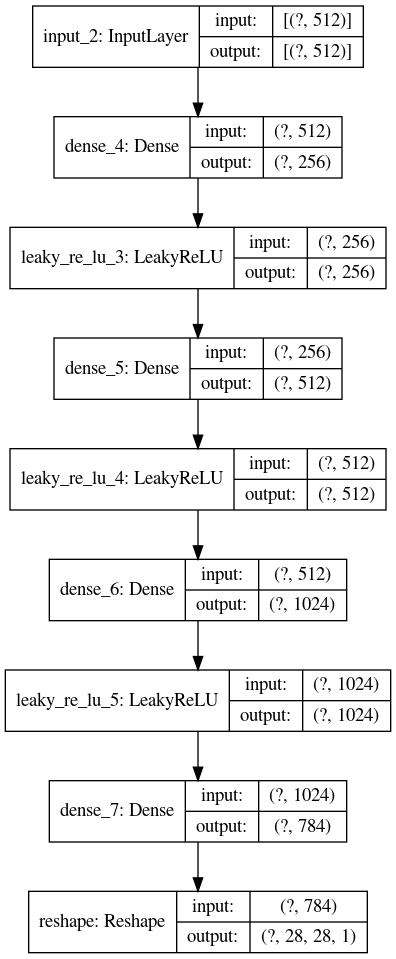

In [7]:
# Plot decoder model.
tf.keras.utils.plot_model(
    model=vanilla_decoder,
    to_file="vanilla_decoder_model.png",
    show_shapes=True,
    show_layer_names=True
)

We'll create a custom `Model` class named `Autoencoder` that we can use to facilitate training of our encoder and decoder networks.

In [8]:
class Autoencoder(tf.keras.Model):
    """Custom model for training an autoencoder.

    Attributes:
        encoder: Keras `Model`, the encoder network.
        decoder: Keras `Model`, the decoder network.
        latent_dim: int, the latent vector dimension length.
        encoder_optimizer: Keras `Optimizer`, optimizer for
            encoder network.
        decoder_optimizer: Keras `Optimizer`, optimizer for decoder
            network.
        loss_fn: Keras `Loss`, loss function for training both networks.
    """
    def __init__(self, encoder, decoder, latent_dim):
        """Instantiates `Autoencoder` model class.

        Args:
            encoder: Keras `Model`, the encoder network.
            decoder: Keras `Model`, the decoder network.
            latent_dim: int, the latent vector dimension length.
        """
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.latent_dim = latent_dim

    def compile(self, encoder_optimizer, decoder_optimizer, loss_fn):
        """Overrides base `Model` class' compile method.

        Args:
            encoder_optimizer: Keras `Optimizer`, optimizer for
                encoder network.
            decoder_optimizer: Keras `Optimizer`, optimizer for decoder
                network.
            loss_fn: Keras `Loss`, loss function for training both networks.
        """
        super(Autoencoder, self).compile()
        self.encoder_optimizer = encoder_optimizer
        self.decoder_optimizer = decoder_optimizer
        self.loss_fn = loss_fn

    def train_step(self, images):
        """Trains `Autoencoder` for one step.

        Args:
            images: tensor, rank 4 tensor of images with shape
                (batch_size, height, width, depth).

        Returns:
            losses: dict, dictionary containing scalar loss.
        """
        if isinstance(images, tuple):
            images = images[0]

        with tf.GradientTape(persistent=True) as tape:
            # Encode images into latent vector/code.
            latent_vectors = self.encoder(inputs=images)

            # Generate reconstructed images from latent vectors.
            reconstructed_images = self.decoder(inputs=latent_vectors)

            loss = self.loss_fn(y_true=images, y_pred=reconstructed_images)

        encoder_grads = tape.gradient(
            target=loss,
            sources=self.encoder.trainable_weights
        )

        decoder_grads = tape.gradient(
            target=loss,
            sources=self.decoder.trainable_weights
        )

        self.encoder_optimizer.apply_gradients(
            grads_and_vars=zip(encoder_grads, self.encoder.trainable_weights)
        )

        self.decoder_optimizer.apply_gradients(
            grads_and_vars=zip(decoder_grads, self.decoder.trainable_weights)
        )

        losses = {"loss": loss}

        return losses

    def call(self, images):
        # Encode images into latent vector/code.
        latent_vectors = self.encoder(inputs=images)

        # Generate reconstructed images from latent vectors.
        reconstructed_images = self.decoder(inputs=latent_vectors)

        loss = self.loss_fn(y_true=images, y_pred=reconstructed_images)

        self.add_metric(value=loss, name="loss", aggregation="mean")
        self.add_metric(value=tf.sqrt(x=loss), name="rmse", aggregation="mean")

        return {"loss": loss}
        


In [9]:
def create_dataset(batch_size, training):
    """Creates training dataset.

    Args:
        batch_size: int, number of elements in a mini-batch.
        training: bool, whether training or not.

    Returns:
        dataset: `Dataset`, dataset object for training using MNIST.
    """
    # Get and format MNIST data.
    (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

    if training:
        images = x_train
    else:
        images = x_test

    images = (images.astype("float32") - 127.5) / 255.0
    images = np.reshape(images, newshape=(-1, 28, 28, 1))

    # Create tf.data.Dataset for training.
    dataset = tf.data.Dataset.from_tensor_slices(tensors=images)
    if training:
        dataset = dataset.shuffle(buffer_size=70000)
    dataset = dataset.batch(batch_size=batch_size)

    return dataset


In [10]:
# Instantiate an Autoencoder instance using our vanilla encoder and decoder.
vanilla_autoencoder = Autoencoder(
    encoder=vanilla_encoder, decoder=vanilla_decoder, latent_dim=latent_dim
)

vanilla_autoencoder.compile(
    encoder_optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7
    ),
    decoder_optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7
    ),
    loss_fn=tf.keras.losses.MeanSquaredError()
)

# Train vanilla autoencoder model.
vanilla_autoencoder_history = vanilla_autoencoder.fit(
    create_dataset(batch_size=128, training=True),
    epochs=30,
    validation_data=create_dataset(batch_size=128, training=False)
)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0220 - val_loss: 0.0104 - val_rmse: 0.1022
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0076 - val_rmse: 0.0869
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0072 - val_loss: 0.0068 - val_rmse: 0.0822
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0063 - val_loss: 0.0062 - val_rmse: 0.0786
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0053 - val_rmse: 0.0727
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0052 - val_rmse: 0.0718
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0049 - val_loss: 0.0052 - val_rmse: 0.0722
Epoch 8/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0044 - val_rmse: 0.0663
Epoch 9/30
469/469 [============================

Let's plot the loss history and some generated images using our trained model.

In [11]:
def plot_loss_history(history):
    """Plots loss history.

    Args:
        history: `keras.callbacks.History`, history object from training job.
    """
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Training loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["train_loss", "val_loss"], loc="upper left")
    plt.show()


In [12]:
def plot_rmse(history):
    """Plots RMSE history.

    Args:
        history: `keras.callbacks.History`, history object from training job.
    """
    plt.plot(history.history["val_rmse"])
    plt.title("Validation Metrics")
    plt.ylabel("RMSE")
    plt.xlabel("Epoch")
    plt.show()


In [13]:
def plot_images(images):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, image_size, image_size, num_channels].
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            tf.reshape(image, image.shape[:-1]),
            cmap="gray_r"
        )
    plt.show()

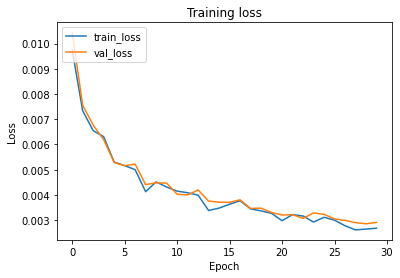

In [14]:
plot_loss_history(history=vanilla_autoencoder_history)

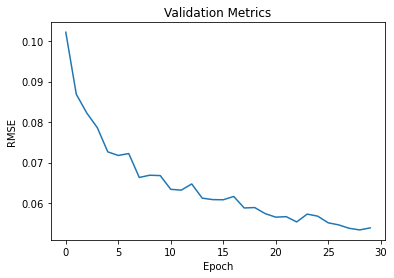

In [15]:
plot_rmse(history=vanilla_autoencoder_history)

Autoencoder is great at reconstruction.

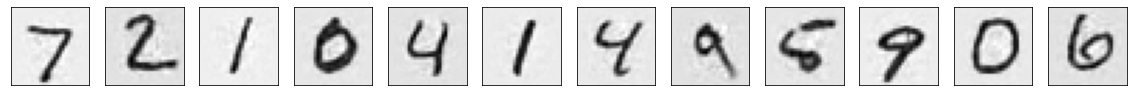

In [16]:
dataset_iter = iter(create_dataset(batch_size=12, training=False))
batch = next(dataset_iter)
plot_images(
    images=vanilla_autoencoder.decoder(
        inputs=vanilla_autoencoder.encoder(inputs=batch)
    )
)

However, the latent space isn't nicely regularized therefore decoding a user provided latent vector performs poorly.

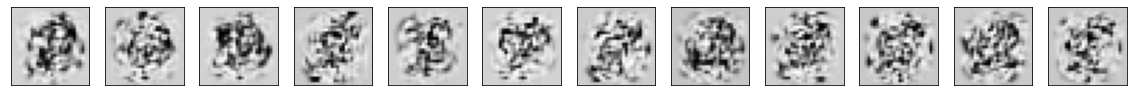

In [17]:
plot_images(
    images=vanilla_autoencoder.decoder(
        inputs=tf.random.normal(shape=(12, latent_dim))
    )
)

## DC-Autoencoder

A Deep-convolutional autoencoder (DC-Autoencoder) uses convolutional (`Conv2D`) and deconvolutional (`Conv2DTranspose`) instead of `Dense` layers for the encoder and decoder respectively.

In [18]:
# Create the encoder
def create_encoder_block(filters, kernel_size, strides, padding, alpha):
    """Creates encoder block of layers.

    Args:
        filters: int, number of output filters/channels.
        kernel_size: int/2-tuple of ints, the height and width of the kernel.
        strides: int/2-tuple of ints, the height and width of each stride of
            sliding window.
        padding: str, the type of padding of the output: same or valid.
        alpha: float, the amount of leakiness of LeakyRelu activations.

    Returns:
        List of layers.
    """
    return [
        tf.keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            strides=strides,
            padding=padding
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=alpha)
    ]

def create_dc_encoder(input_shape, latent_dim):
    """Creates deep convolutional encoder model.

    Args:
        input_shape: tuple, the shape of the input without batch dimension.
        latent_dim: int, the latent vector dimension length.

    Returns:
        Keras Sequential Model.
    """
    dc_encoder = [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(
            filters=64, kernel_size=3, strides=1, padding="same"
        ),
        tf.keras.layers.LeakyReLU(alpha=0.2)
    ] + create_encoder_block(
        filters=128, kernel_size=3, strides=2, padding="same", alpha=0.2
    ) + create_encoder_block(
        filters=128, kernel_size=3, strides=2, padding="same", alpha=0.2
    ) + create_encoder_block(
        filters=256, kernel_size=3, strides=2, padding="same", alpha=0.2
    ) + [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=latent_dim)
    ]

    return tf.keras.Sequential(layers=dc_encoder, name="dc_encoder")

dc_encoder = create_dc_encoder(input_shape=(28, 28, 1), latent_dim=512)
dc_encoder.summary()

Model: "dc_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 128)       512       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         5

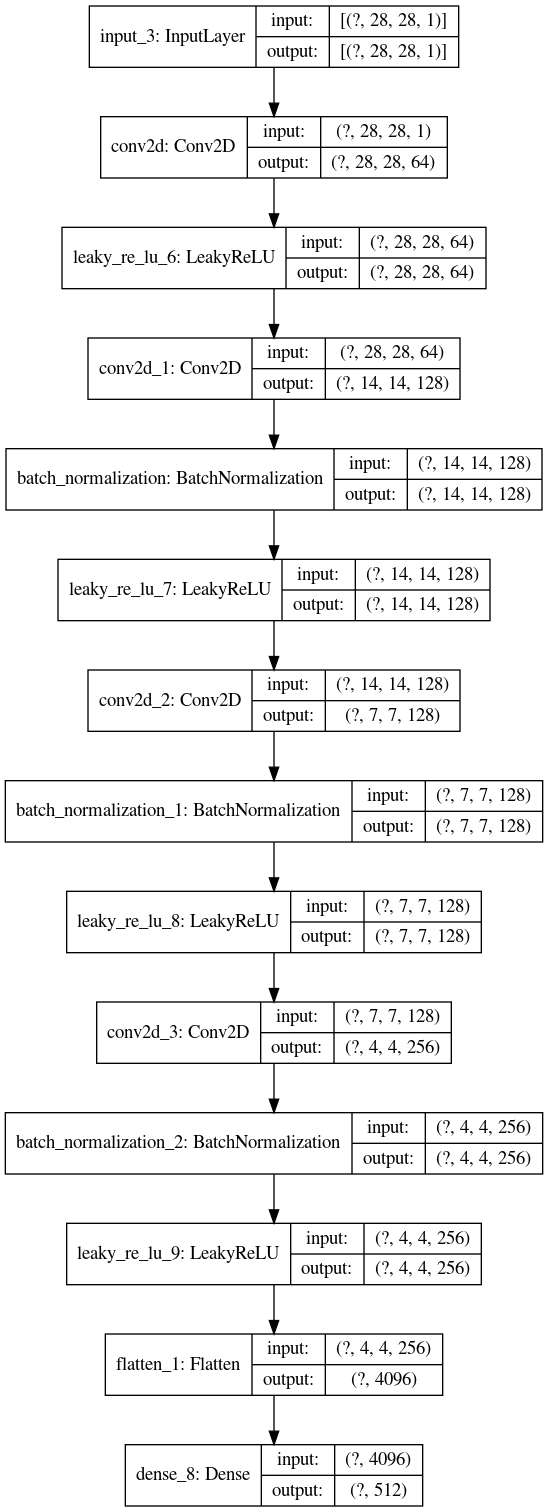

In [19]:
# Plot decoder model.
tf.keras.utils.plot_model(
    model=dc_encoder,
    to_file="dc_encoder_model.png",
    show_shapes=True,
    show_layer_names=True
)

In [21]:
# Create the decoder
def create_decoder_block(filters, kernel_size, strides, padding, alpha):
    """Creates decoder block of layers.

    Args:
        filters: int, number of output filters/channels.
        kernel_size: int/2-tuple of ints, the height and width of the kernel.
        strides: int/2-tuple of ints, the height and width of each stride of
            sliding window.
        padding: str, the type of padding of the output: same or valid.
        alpha: float, the amount of leakiness of LeakyRelu activations.

    Returns:
        List of layers.
    """
    return [
        tf.keras.layers.Conv2DTranspose(
            filters=filters,
            kernel_size=kernel_size,
            strides=strides,
            padding=padding
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=alpha)
    ]

def create_dc_decoder(latent_dim):
    """Creates deep convolutional decoder model.

    Args:
        latent_dim: int, the latent vector dimension length.

    Returns:
        Keras Sequential Model.
    """
    dc_decoder = [
        tf.keras.Input(shape=(latent_dim,)),
        tf.keras.layers.Dense(units=7 * 7 * 256),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Reshape(target_shape=(7, 7, 256))
    ] + create_decoder_block(
        filters=128, kernel_size=4, strides=2, padding="same", alpha=0.2
    ) + create_decoder_block(
        filters=128, kernel_size=4, strides=2, padding="same", alpha=0.2
    ) + [
        tf.keras.layers.Conv2DTranspose(
            filters=1,
            kernel_size=3,
            strides=1,
            padding="same",
            activation="tanh"
        )
    ]

    return tf.keras.Sequential(layers=dc_decoder, name="dc_decoder")

dc_decoder = create_dc_decoder(latent_dim=512)
dc_decoder.summary()

Model: "dc_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12544)             6435072   
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 12544)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 128)       524416    
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 28, 28, 128)       2

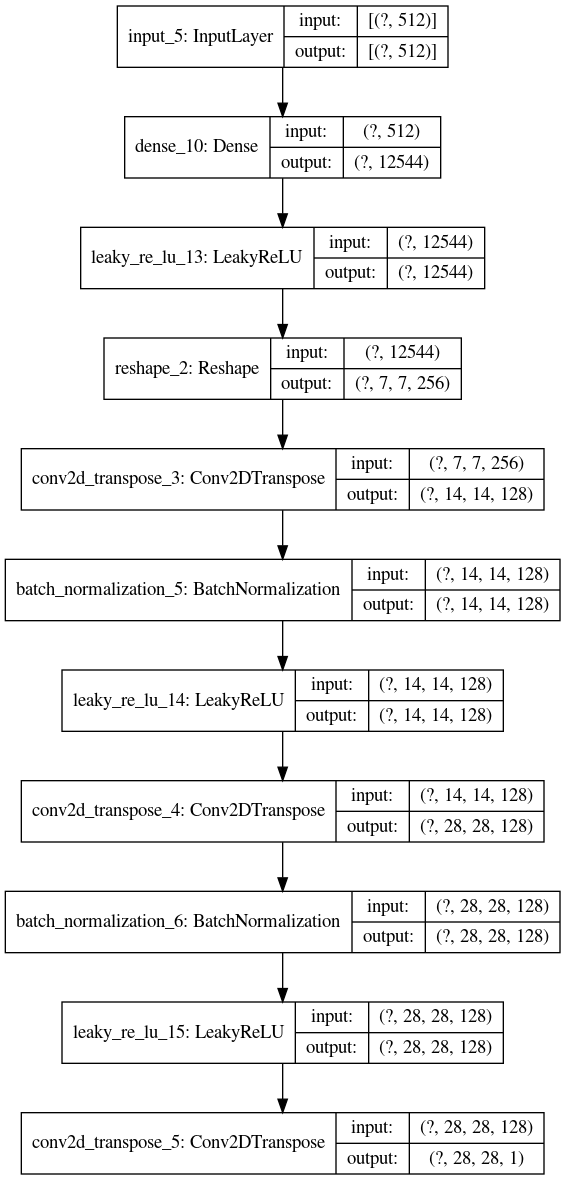

In [22]:
# Plot decoder model.
tf.keras.utils.plot_model(
    model=dc_decoder,
    to_file="dc_decoder_model.png",
    show_shapes=True,
    show_layer_names=True
)

In [23]:
# Instantiate an `Autoencoder` instance using our DC encoder and decoder.
dc_autoencoder = Autoencoder(
    encoder=dc_encoder, decoder=dc_decoder, latent_dim=latent_dim
)

dc_autoencoder.compile(
    encoder_optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0002, beta_1=0.5, beta_2=0.999, epsilon=1e-8
    ),
    decoder_optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0002, beta_1=0.5, beta_2=0.999, epsilon=1e-8
    ),
    loss_fn=tf.keras.losses.MeanSquaredError()
)

# Train DC-Autoencoder model.
dc_autoencoder_history = dc_autoencoder.fit(
    create_dataset(batch_size=128, training=True),
    epochs=30,
    validation_data=create_dataset(batch_size=128, training=False)
)

Epoch 1/30
469/469 [==============================] - 32s 68ms/step - loss: 0.0228 - val_loss: 0.0063 - val_rmse: 0.0790
Epoch 2/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0043 - val_loss: 0.0032 - val_rmse: 0.0567
Epoch 3/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0030 - val_loss: 0.0024 - val_rmse: 0.0493
Epoch 4/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0024 - val_loss: 0.0020 - val_rmse: 0.0445
Epoch 5/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0020 - val_loss: 0.0021 - val_rmse: 0.0453
Epoch 6/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0017 - val_loss: 0.0015 - val_rmse: 0.0387
Epoch 7/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0015 - val_loss: 0.0016 - val_rmse: 0.0400
Epoch 8/30
469/469 [==============================] - 30s 64ms/step - loss: 0.0014 - val_loss: 0.0015 - val_rmse: 0.0387
Epoch 9/30
469/469 [============

Let's plot the loss history and some generated images using our trained model.

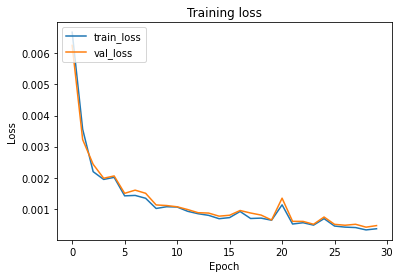

In [24]:
plot_loss_history(history=dc_autoencoder_history)

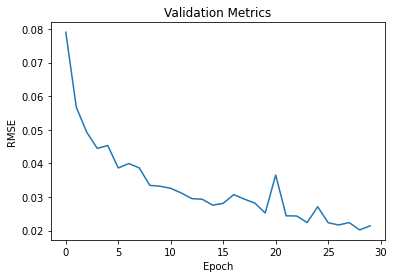

In [25]:
plot_rmse(history=dc_autoencoder_history)

Autoencoder is great at reconstruction.

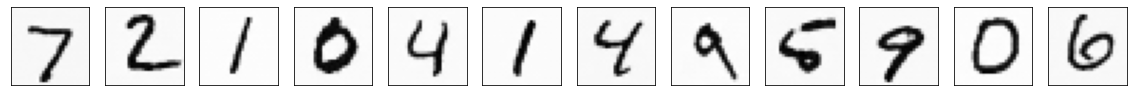

In [26]:
dataset_iter = iter(create_dataset(batch_size=12, training=False))
batch = next(dataset_iter)
plot_images(
    images=dc_autoencoder.decoder(
        inputs=dc_autoencoder.encoder(inputs=batch)
    )
)

However, the latent space isn't nicely regularized therefore decoding a user provided latent vector performs poorly.

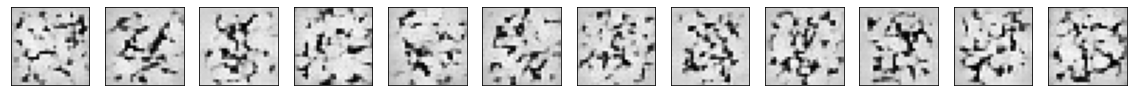

In [27]:
plot_images(
    images=dc_autoencoder.decoder(
        inputs=tf.random.normal(shape=(12, latent_dim))
    )
)